## 1. preprocessing

### 1-1 데이터 확인

In [1]:
import pandas as pd
data=pd.read_csv('201901-202003 (1).csv')
data.columns = ['연월','카드이용_시도','카드이용_시군구','업종명','고객거주_시도','고객거주_시군구','연령대','성별','가구생애주기','이용고객수','이용금액','이용건수']
data.head(2)

,연월,카드이용_시도,카드이용_시군구,업종명,고객거주_시도,고객거주_시군구,연령대,성별,가구생애주기,이용고객수,이용금액,이용건수
0,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,1,1,4,311200,4
1,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,7,1374500,8


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24697792 entries, 0 to 24697791
Data columns (total 12 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   연월        int64 
 1   카드이용_시도   object
 2   카드이용_시군구  object
 3   업종명       object
 4   고객거주_시도   object
 5   고객거주_시군구  object
 6   연령대       object
 7   성별        int64 
 8   가구생애주기    int64 
 9   이용고객수     int64 
 10  이용금액      int64 
 11  이용건수      int64 
dtypes: int64(6), object(6)
memory usage: 2.2+ GB


### 1-2 결측치 확인

In [3]:
data.isnull().sum()

연월               0
카드이용_시도          0
카드이용_시군구     87213
업종명              0
고객거주_시도          0
고객거주_시군구    147787
연령대              0
성별               0
가구생애주기           0
이용고객수            0
이용금액             0
이용건수             0
dtype: int64

카드이용_시군구 와 고객거주_시군구의 결측치가 다르다.

In [4]:
data_nullcard = data[data['카드이용_시군구'].isnull()==True]
data_nullcard['카드이용_시도'].unique()

array(['세종'], dtype=object)

카드이용_시군구의 결측치는 카드이용_시도의 '세종' 지역에만 나타나는 것을 확인

In [5]:
data_nullhom = data[data['고객거주_시군구'].isnull()==True]
data_nullhom['고객거주_시도'].unique()

array(['세종'], dtype=object)

고객거주_시군구의 결측치는 고객거주_시도의 '세종' 지역에만 나타나는 것을 확인,<br>
크게 잘라서 비교를 할거라서 카드이용_시군구, 고객거주_시군구는 데이터 프레임에서 삭제

In [6]:
del data['고객거주_시군구']
del data['카드이용_시군구']
data.head(2)

,연월,카드이용_시도,업종명,고객거주_시도,연령대,성별,가구생애주기,이용고객수,이용금액,이용건수
0,201901,강원,건강보조식품 소매업,강원,20s,1,1,4,311200,4
1,201901,강원,건강보조식품 소매업,강원,30s,1,2,7,1374500,8


### 1-3 연령대 int로 바꾸기

In [7]:
data['연령대'] = data['연령대'].str.rstrip('s').astype('int')
data.head(2)

,연월,카드이용_시도,업종명,고객거주_시도,연령대,성별,가구생애주기,이용고객수,이용금액,이용건수
0,201901,강원,건강보조식품 소매업,강원,20,1,1,4,311200,4
1,201901,강원,건강보조식품 소매업,강원,30,1,2,7,1374500,8


In [8]:
data['연령대'].dtypes

dtype('int32')

## 2. Feature Engineering

### 2-1 년월 momth,year 열 만들기

In [9]:
data['년'] = data['연월'].astype(str).str[0:4]

In [10]:
data['월'] = data['연월'].astype(str).str[4:6]

In [11]:
data.head(2)

,연월,카드이용_시도,업종명,고객거주_시도,연령대,성별,가구생애주기,이용고객수,이용금액,이용건수,년,월
0,201901,강원,건강보조식품 소매업,강원,20,1,1,4,311200,4,2019,01
1,201901,강원,건강보조식품 소매업,강원,30,1,2,7,1374500,8,2019,01


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24697792 entries, 0 to 24697791
Data columns (total 12 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   연월       int64 
 1   카드이용_시도  object
 2   업종명      object
 3   고객거주_시도  object
 4   연령대      int32 
 5   성별       int64 
 6   가구생애주기   int64 
 7   이용고객수    int64 
 8   이용금액     int64 
 9   이용건수     int64 
 10  년        object
 11  월        object
dtypes: int32(1), int64(6), object(5)
memory usage: 2.1+ GB


In [13]:
data['년'] = data['년'].astype('int')
data['월'] = data['월'].astype('int')

### 2-2 계절열 만들기

In [14]:
# def test(x):
#     if x == '1':
#         return '겨울'
#     elif x == '2':
#         return '겨울'
#     elif x == '3':
#         return '봄'
#     elif x == '4':
#         return '봄'
#     elif x == '5':
#         return '봄'
#     elif x == '6':
#         return '여름'
#     elif x == '7':
#         return '여름'
#     elif x == '8':
#         return '여름'
#     elif x == '9':
#         return '가을'
#     elif x == '10':
#         return '가을'
#     elif x == '11':
#         return '가을'
#     else :
#         return '겨울'

In [15]:
# data['계절'] = data['월'].apply(test)

In [15]:
import numpy as np
data['계절'] = np.nan

data['계절'][data['월'] == 1]='겨울'
data['계절'][data['월'] == 2]='겨울'
data['계절'][data['월'] == 3]='봄'
data['계절'][data['월'] == 4]='봄'
data['계절'][data['월'] == 5]='봄'
data['계절'][data['월'] == 6]='여름'
data['계절'][data['월'] == 7]='여름'
data['계절'][data['월'] == 8]='여름'
data['계절'][data['월'] == 9]='가을'
data['계절'][data['월'] == 10]='가을'
data['계절'][data['월'] == 11]='가을'
data['계절'][data['월'] == 12]='겨울'

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value i

### 2-3 Feature Selection

#### 상관계수 확인

In [70]:
data.corr()

,연월,연령대,성별,가구생애주기,이용고객수,이용금액,이용건수,년,월
연월,1.000000,-0.006687,-0.009399,-0.005525,0.001432,0.003167,0.002144,0.996285,-0.415365
연령대,-0.006687,1.000000,-0.035971,0.941290,0.005859,0.040106,-0.001485,-0.006279,-0.001276
성별,-0.009399,-0.035971,1.000000,-0.023134,0.008258,-0.005424,0.000469,-0.009218,0.002361
가구생애주기,-0.005525,0.941290,-0.023134,1.000000,0.006774,0.041099,-0.001011,-0.005211,-0.000808
이용고객수,0.001432,0.005859,0.008258,0.006774,1.000000,0.866339,0.930356,0.001368,0.000025
이용금액,0.003167,0.040106,-0.005424,0.041099,0.866339,1.000000,0.778102,0.003120,-0.000948
이용건수,0.002144,-0.001485,0.000469,-0.001011,0.930356,0.778102,1.000000,0.001970,0.000868
년,0.996285,-0.006279,-0.009218,-0.005211,0.001368,0.003120,0.001970,1.000000,-0.492162
월,-0.415365,-0.001276,0.002361,-0.000808,0.000025,-0.000948,0.000868,-0.492162,1.000000


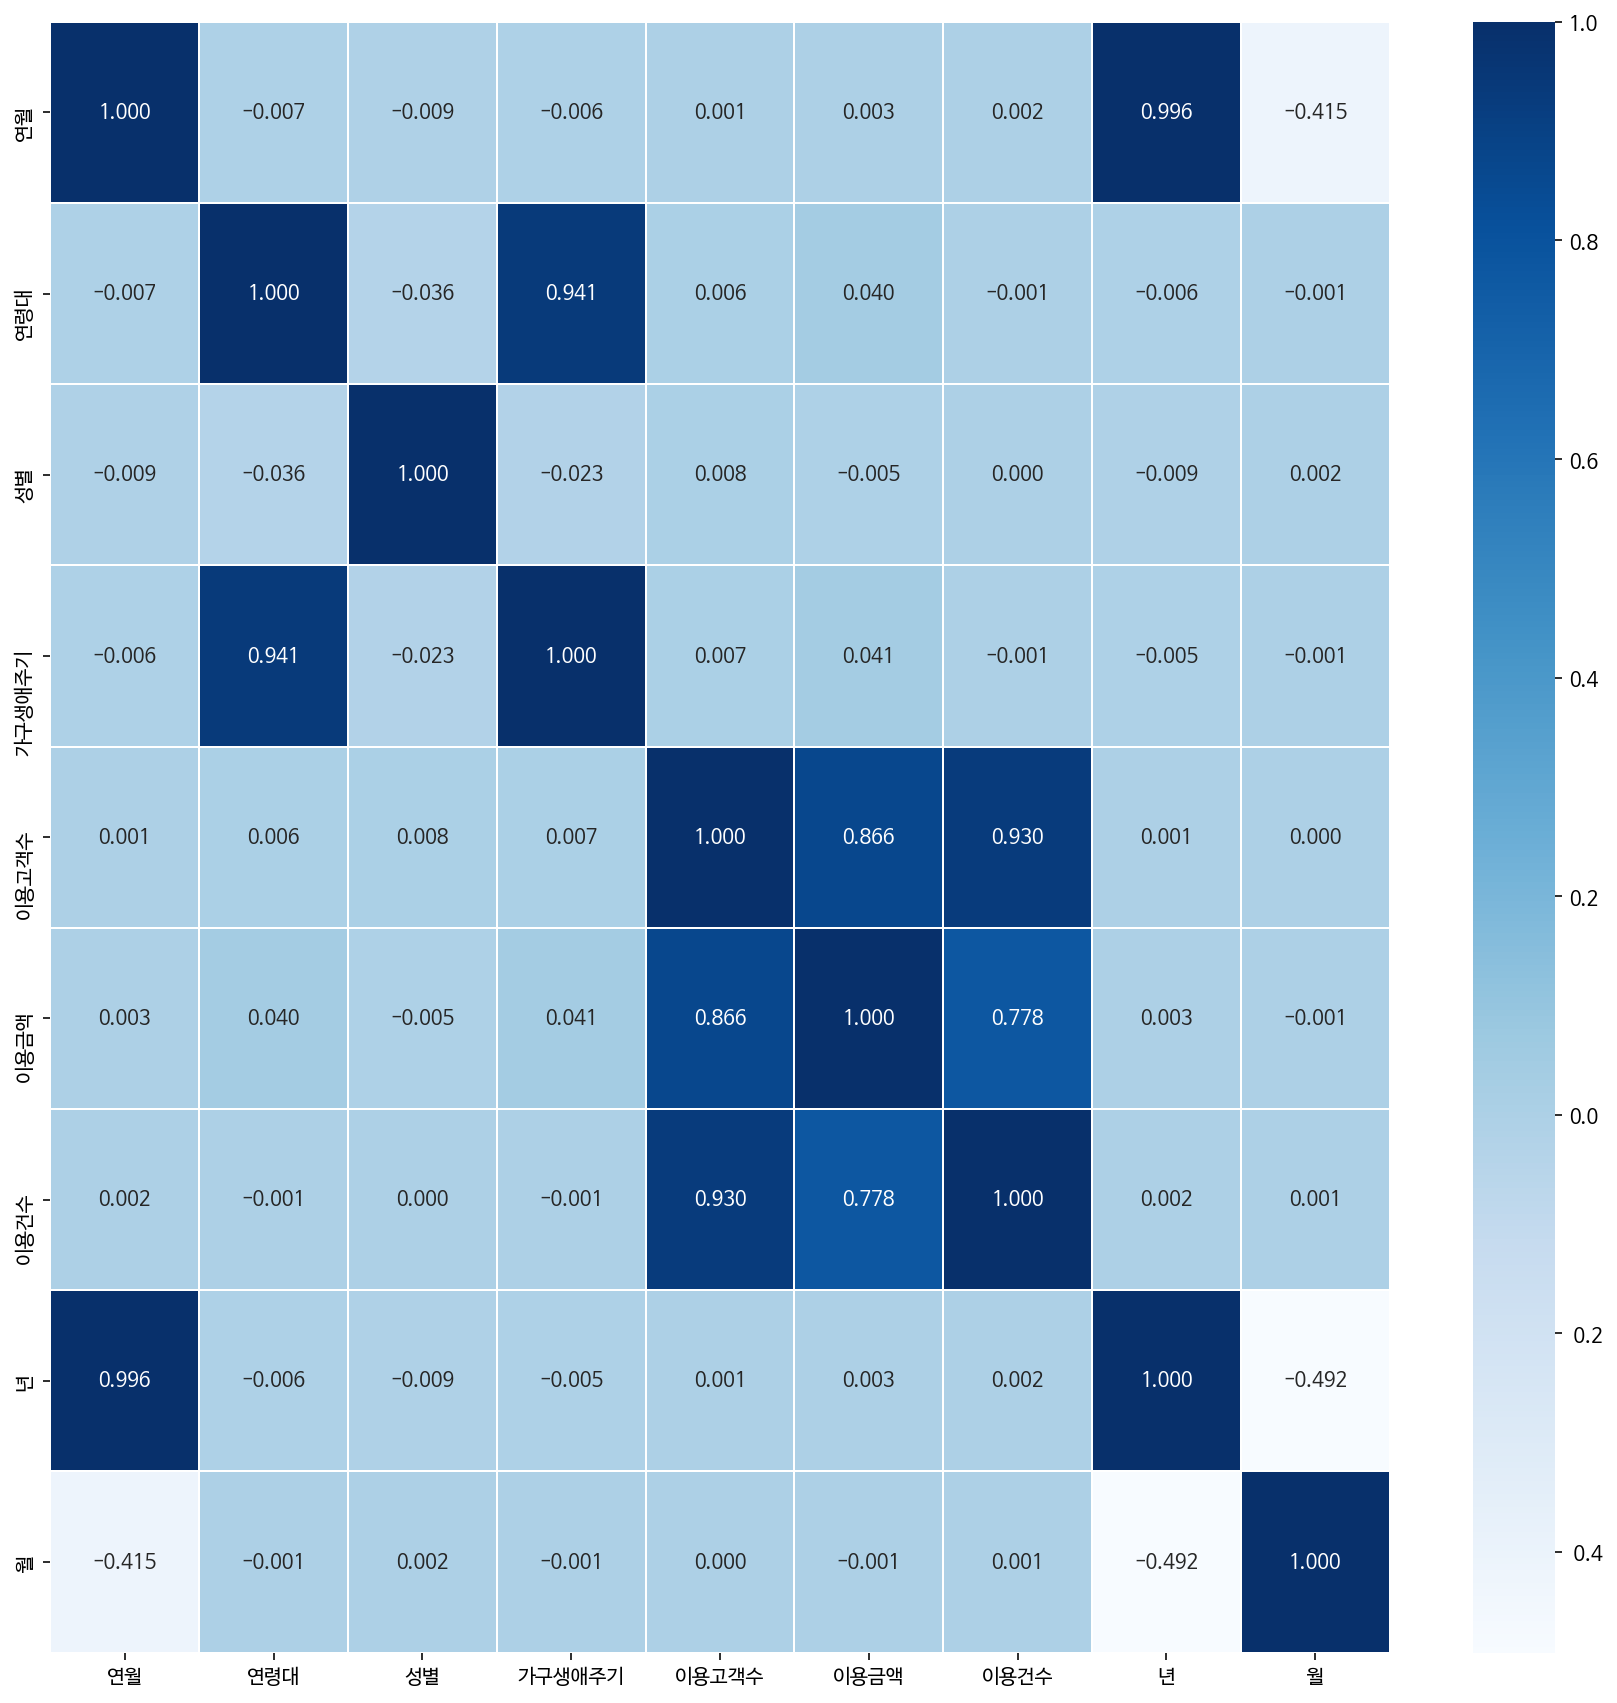

In [74]:
# 그래프 확인
plt.figure(figsize=(15,15))
sns.heatmap(data = data.corr(), annot=True, 
fmt = '.3f', linewidths=.5, cmap='Blues')

이렇게 보면 불편하다고 교수님이 피드백을 주셨음. 하상각행렬로 나타내보기

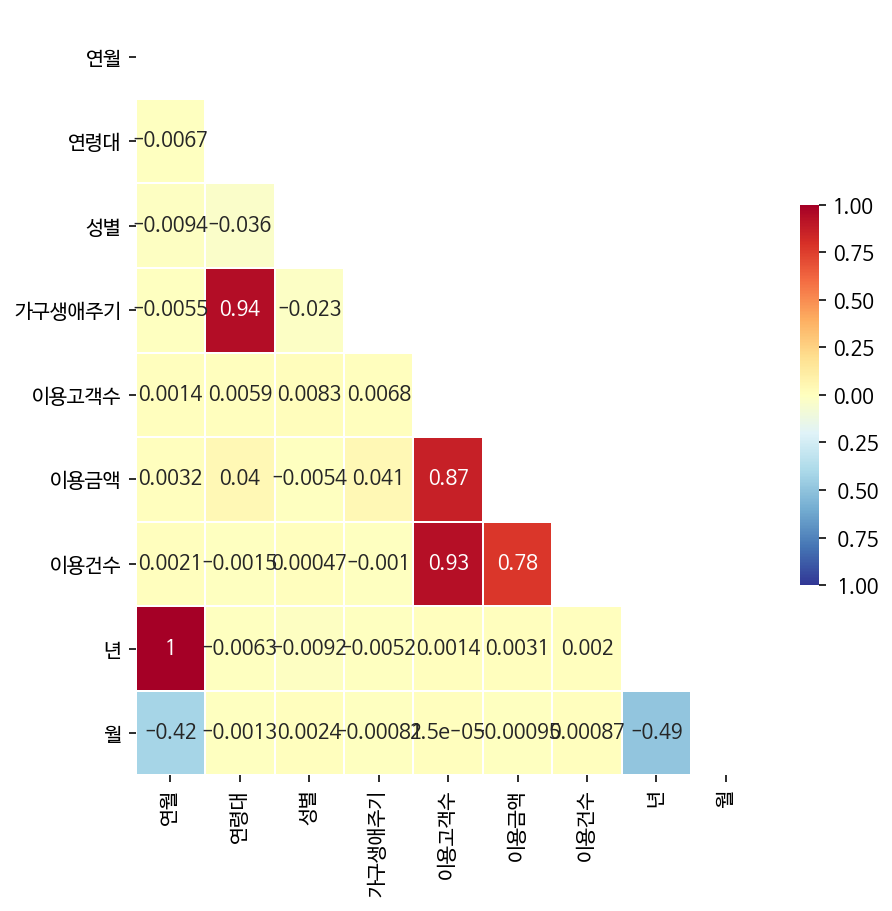

In [73]:
df = data.corr()
# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(7,7) )

# 위 쪽 삼각형에 True, 아래 삼각형에 False
mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(df, 
            cmap = 'RdYlBu_r', 
            annot = True,   
            mask=mask,      # 표시하지 않을 마스크 부분 지정
            linewidths=.5,  # 경계면 실선으로 구분
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

## 3. Visualization

### 3-1 2019년 계절별 금액

In [16]:
data_2019 = data[data['년']==2019]

In [17]:
data_2019

,연월,카드이용_시도,업종명,고객거주_시도,연령대,성별,가구생애주기,이용고객수,이용금액,이용건수,년,월,계절
0,201901,강원,건강보조식품 소매업,강원,20,1,1,4,311200,4,2019,1,겨울
1,201901,강원,건강보조식품 소매업,강원,30,1,2,7,1374500,8,2019,1,겨울
2,201901,강원,건강보조식품 소매업,강원,30,2,2,6,818700,6,2019,1,겨울
3,201901,강원,건강보조식품 소매업,강원,40,1,3,4,1717000,5,2019,1,겨울
4,201901,강원,건강보조식품 소매업,강원,40,1,4,3,1047300,3,2019,1,겨울
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20425410,201912,충북,휴양콘도 운영업,충북,40,2,4,4,227000,5,2019,12,겨울
20425411,201912,충북,휴양콘도 운영업,충북,50,1,4,10,330000,14,2019,12,겨울
20425412,201912,충북,휴양콘도 운영업,충북,50,2,4,14,860000,19,2019,12,겨울
20425413,201912,충북,휴양콘도 운영업,충북,60,1,5,5,228000,7,2019,12,겨울


In [18]:
print("2019년 합 : " + str(len(data_2019)))
print("2020년 합 : " + str(len(data)-len(data_2019)))
print("전체 데이터 합 : " + str(len(data)))

2019년 합 : 20425415
2020년 합 : 4272377
전체 데이터 합 : 24697792


In [19]:
season_1 =data_2019['계절']=='겨울'
season_2 =data_2019['계절']=='봄'
season_3 =data_2019['계절']=='여름'
season_4 =data_2019['계절']=='가을'

In [20]:
import numpy as np
print(np.sum(season_1)) # 겨울
print(np.sum(season_2)) # 봄
print(np.sum(season_3)) # 여름
print(np.sum(season_4)) # 가을

4875679
5096567
5314345
5138824


겨울,봄,여름,가을의 개수가 다르기 때문에 sum이 아닌 mean 으로 할거임

In [21]:
data_2019_vis = data_2019.groupby(['계절'])[['이용고객수','이용금액','이용건수']].mean().reset_index()

In [22]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

%config InlineBackend.figure_format = 'retina'
 
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

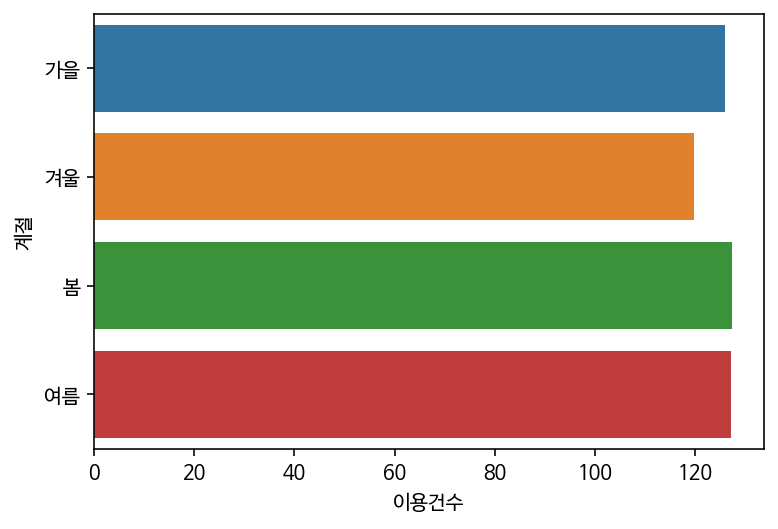

In [23]:
import seaborn as sns
sns.barplot(x = data_2019_vis['이용건수'],y=data_2019_vis['계절'],ci=None )

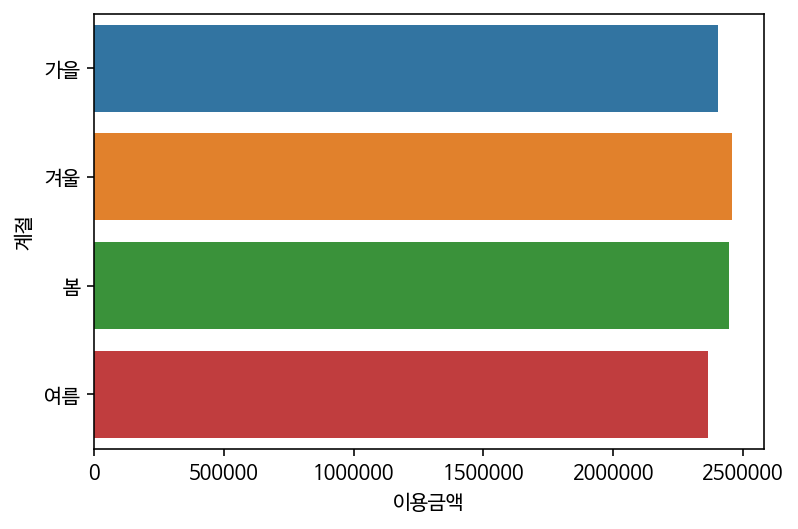

In [24]:
sns.barplot(x = data_2019_vis['이용금액'],y=data_2019_vis['계절'],ci=None )

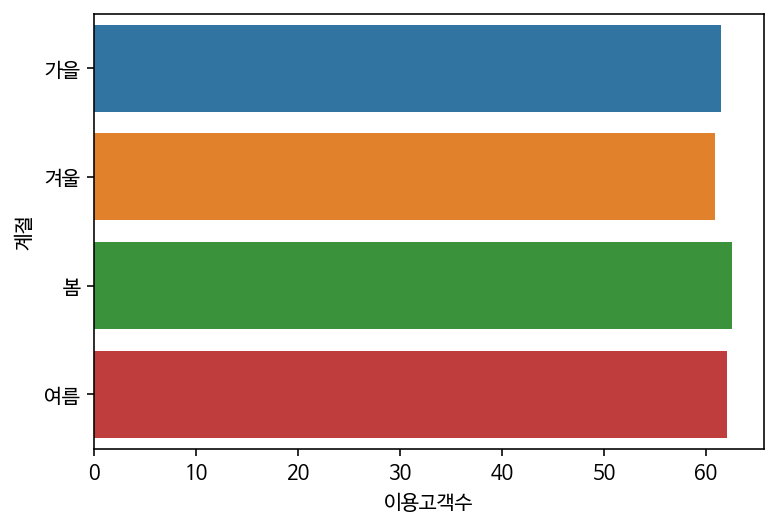

In [25]:
sns.barplot(x = data_2019_vis['이용고객수'],y=data_2019_vis['계절'],ci=None )

In [26]:
data_2019_vis = data_2019.groupby(['계절','업종명'])[['이용고객수','이용금액','이용건수']].mean().reset_index()

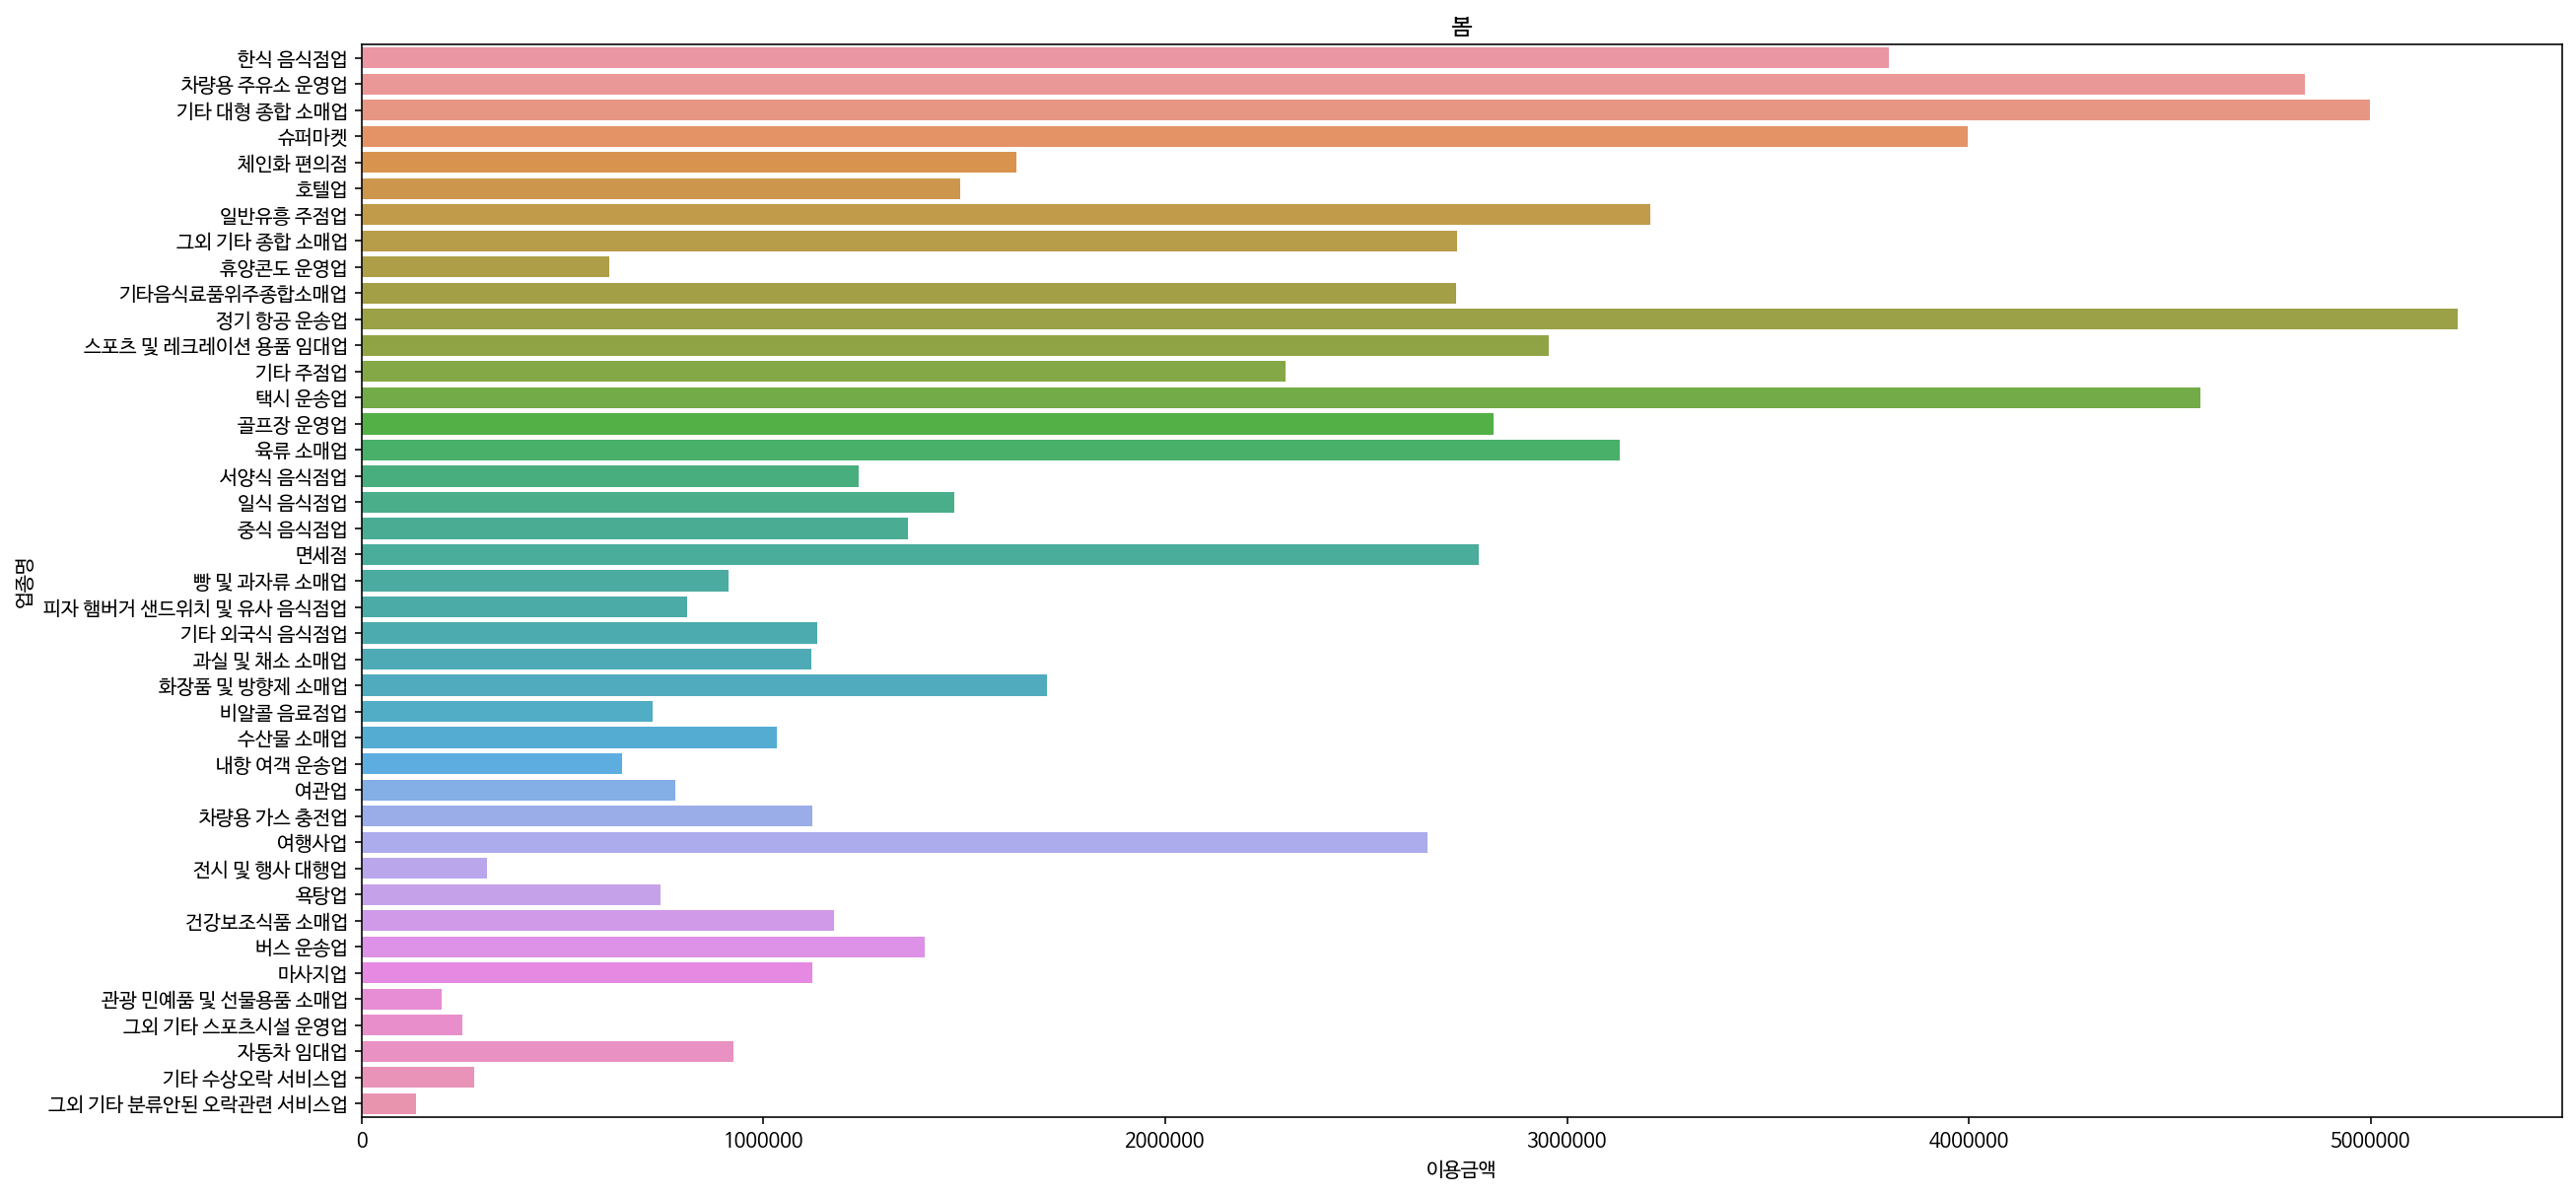

In [27]:
where=data_2019[data_2019['계절']=='봄']
where=where.sort_values(by='이용금액',ascending=False)
fig = plt.figure(figsize = (20,10))
sns.barplot(x =where['이용금액'], y = where['업종명'],ci=None)
plt.title('봄')
plt.show()

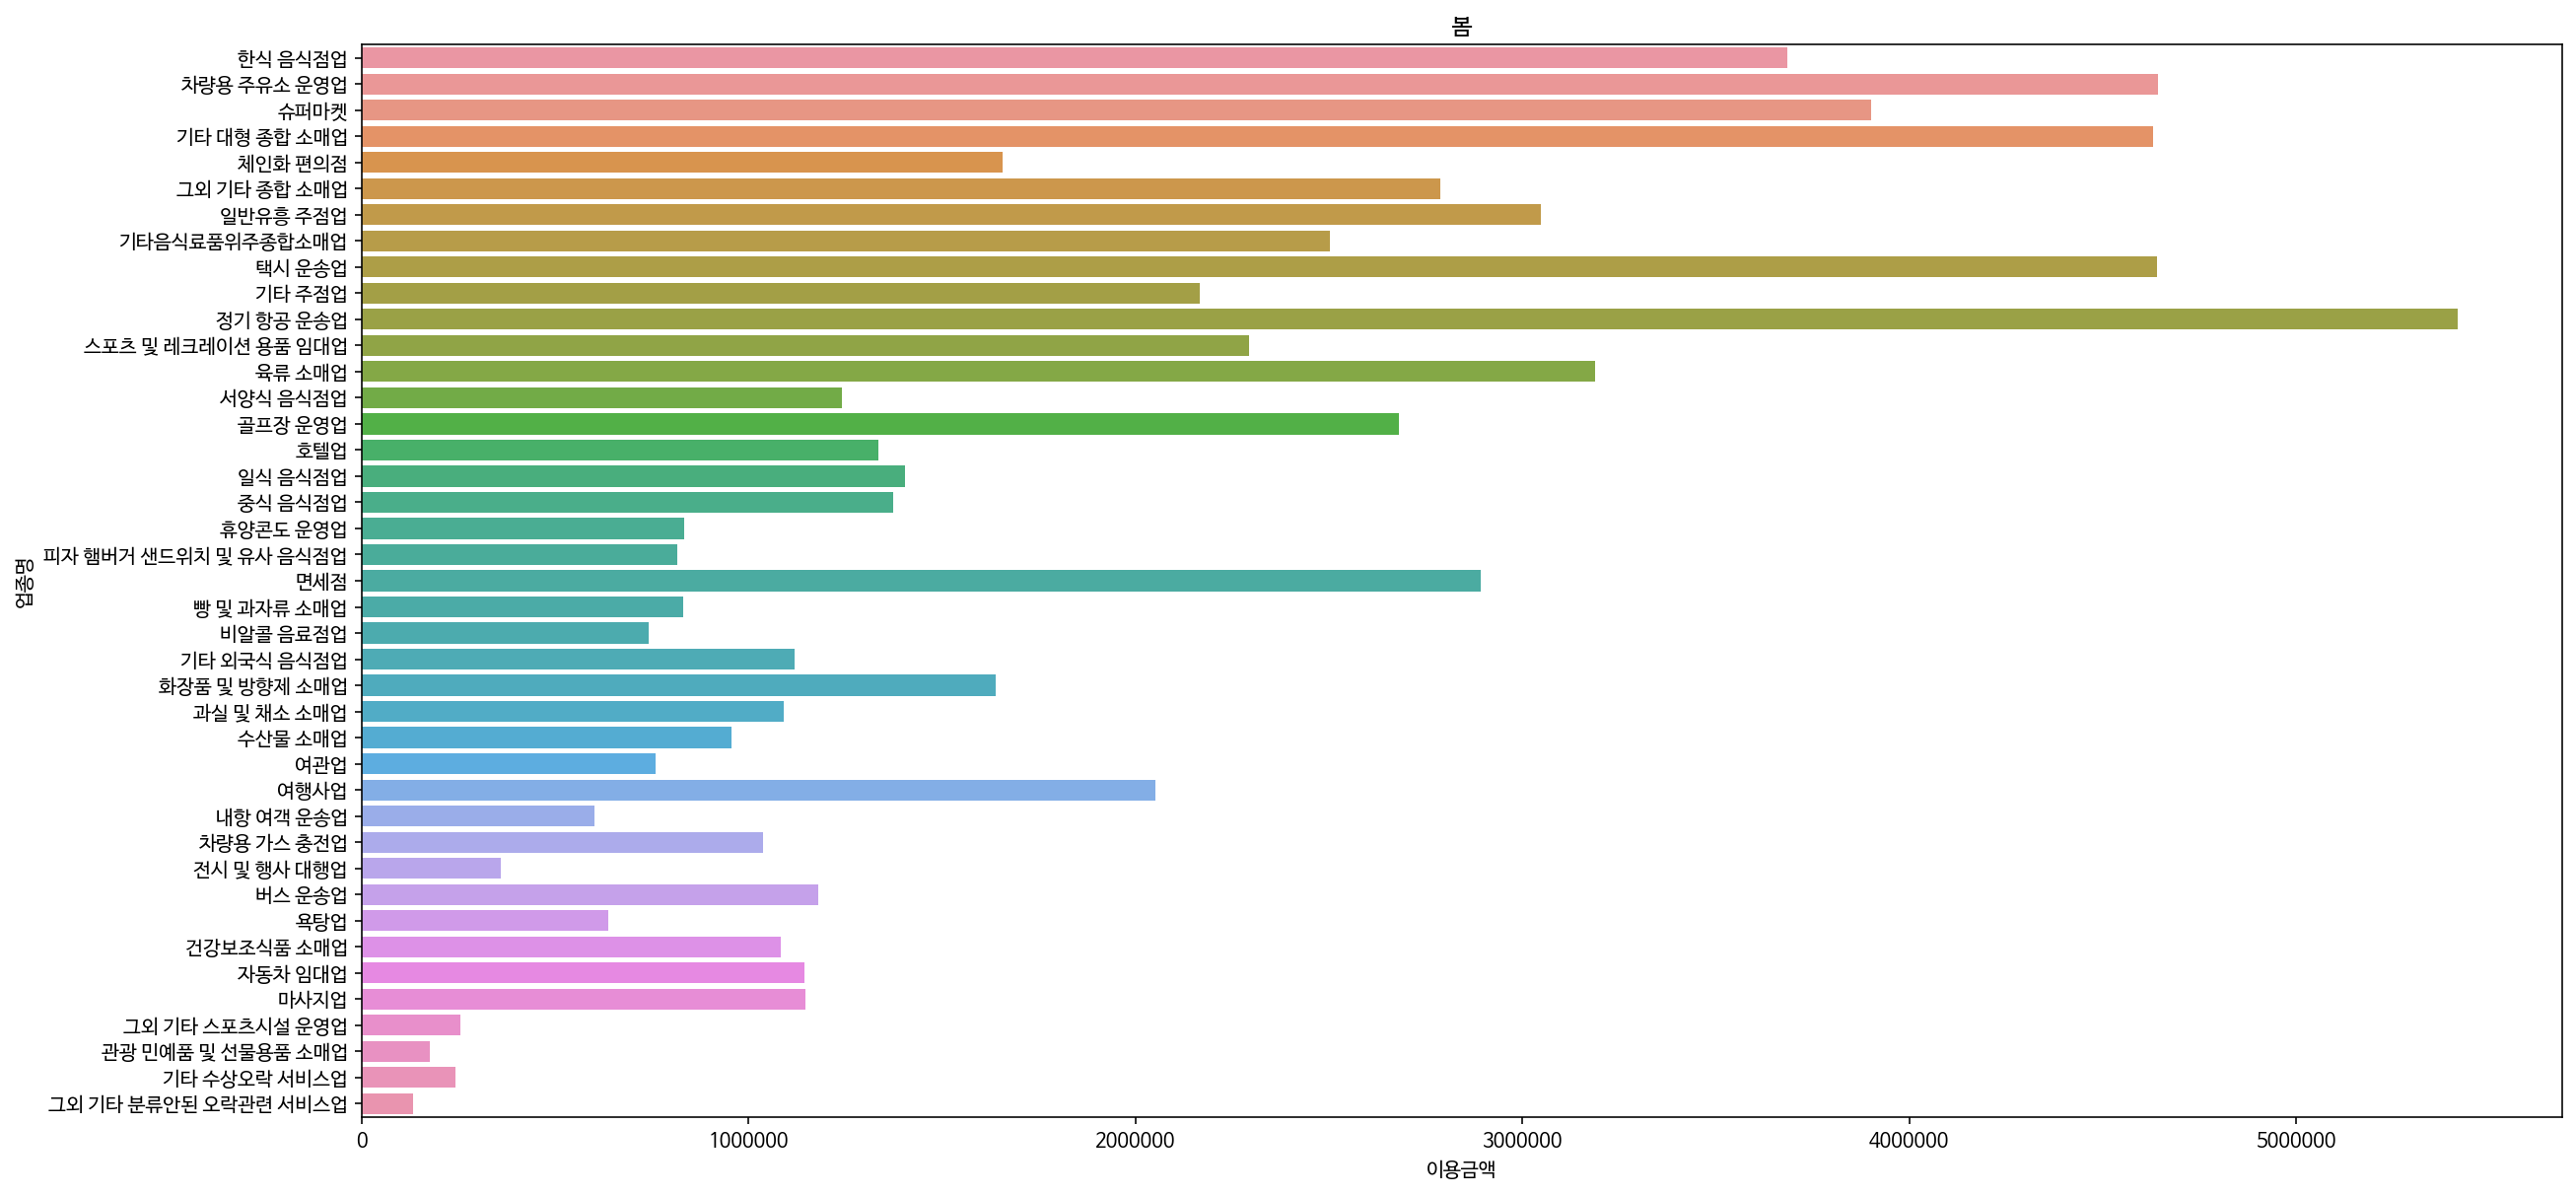

In [28]:
where=data_2019[data_2019['계절']=='여름']
where=where.sort_values(by='이용금액',ascending=False)
fig = plt.figure(figsize = (20,10))
sns.barplot(x =where['이용금액'], y = where['업종명'],ci=None)
plt.title('봄')
plt.show()

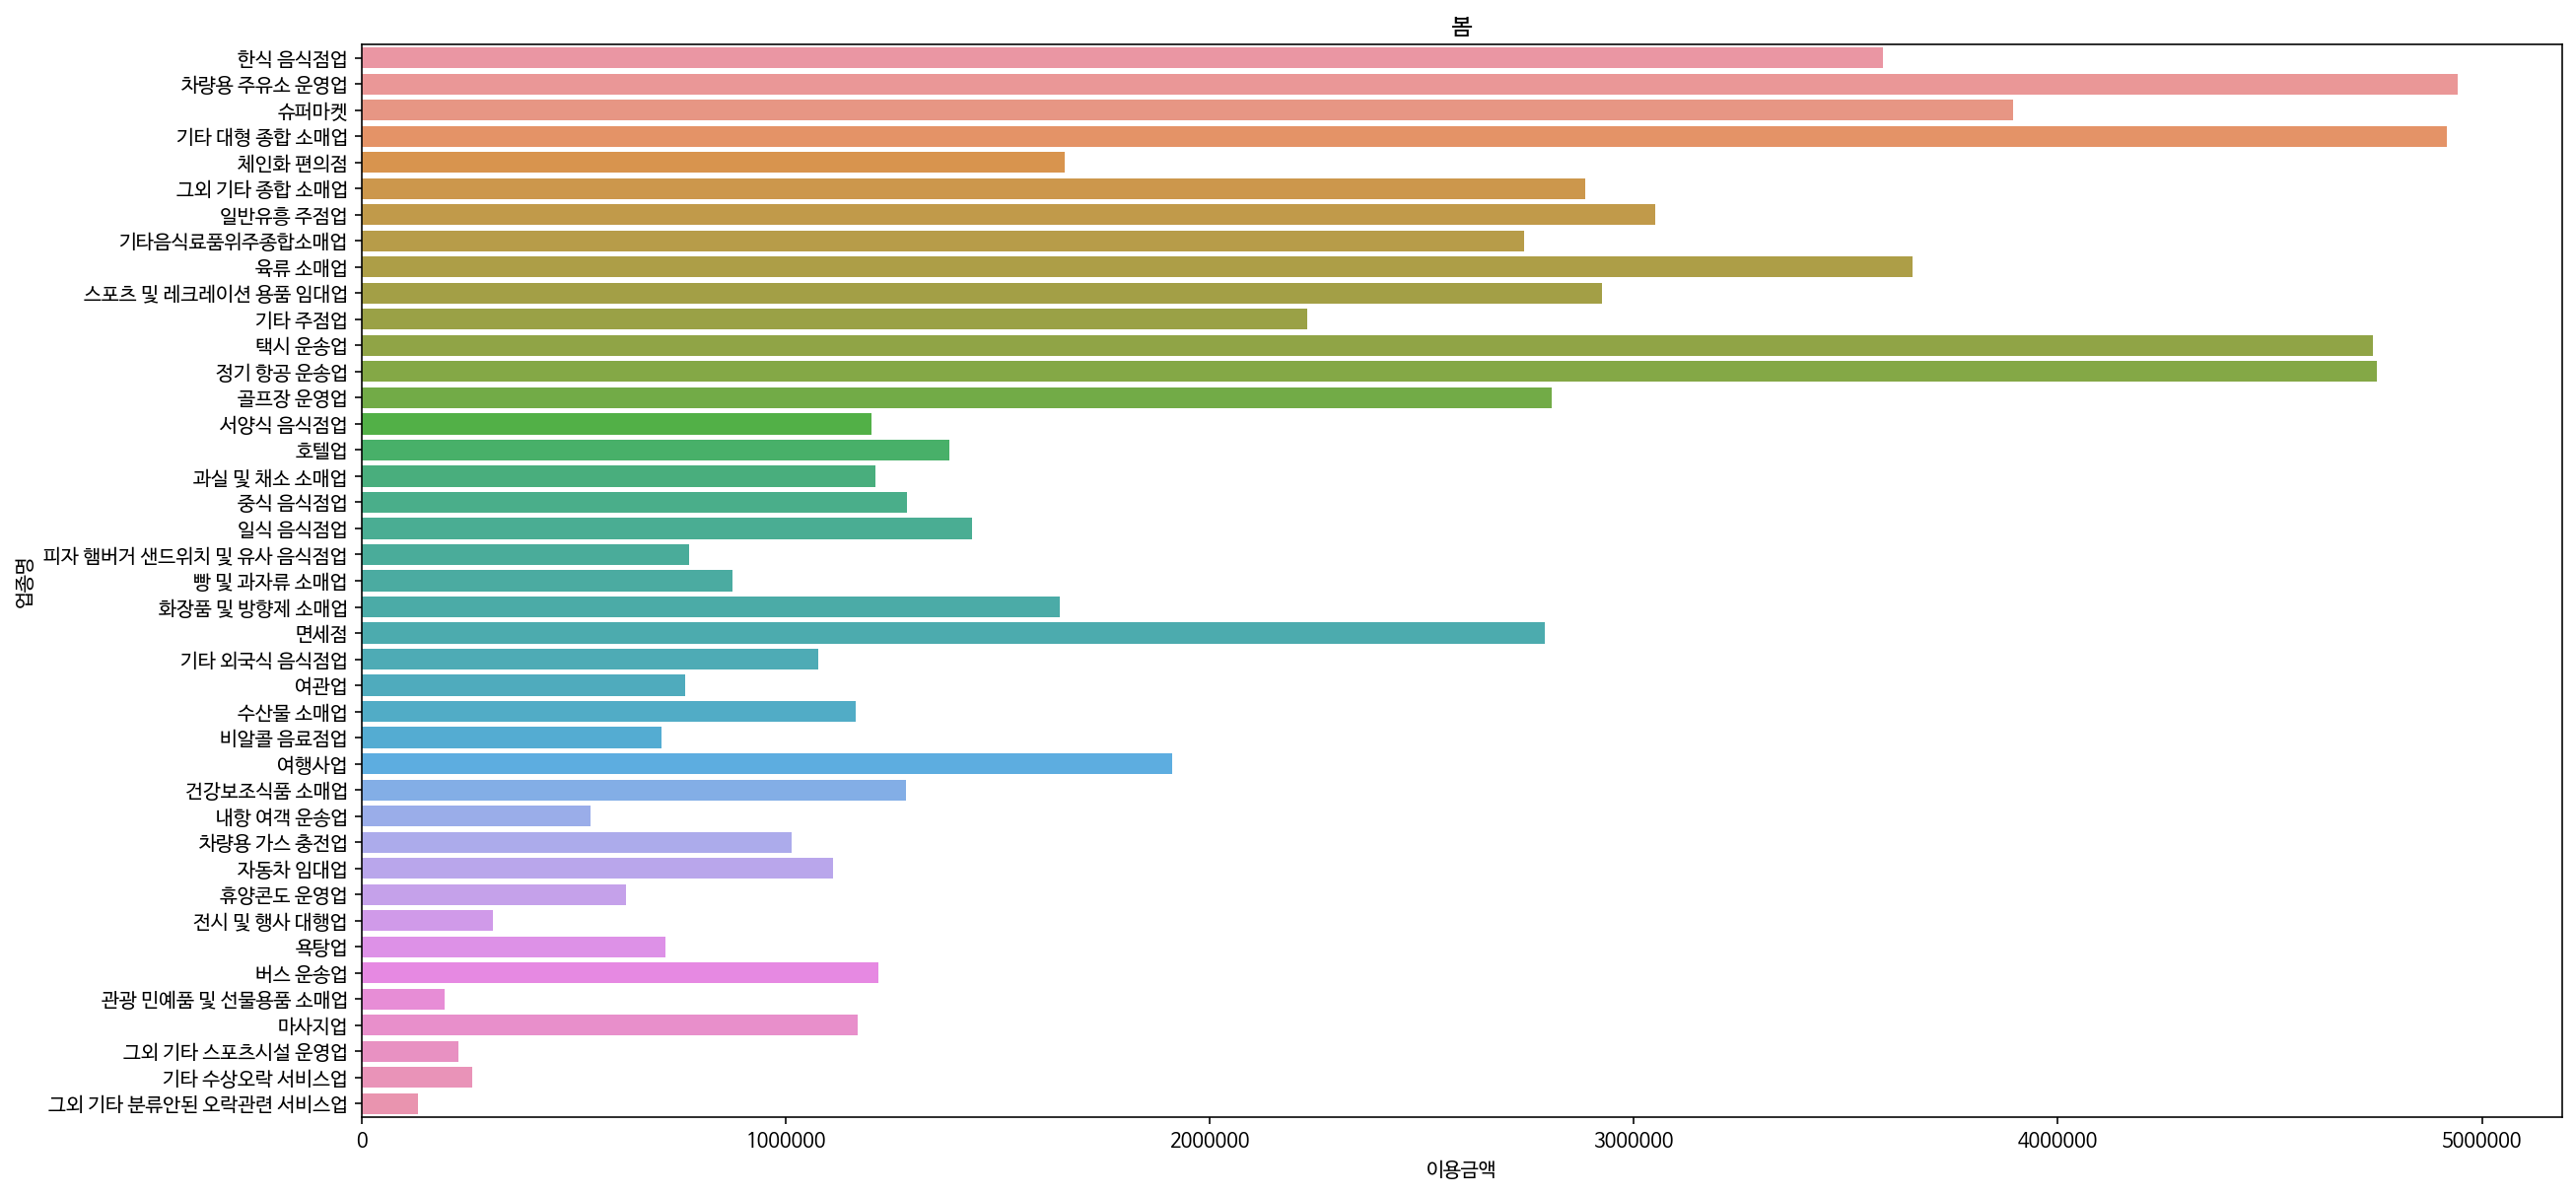

In [29]:
where=data_2019[data_2019['계절']=='가을']
where=where.sort_values(by='이용금액',ascending=False)
fig = plt.figure(figsize = (20,10))
sns.barplot(x =where['이용금액'], y = where['업종명'],ci=None)
plt.title('봄')
plt.show()

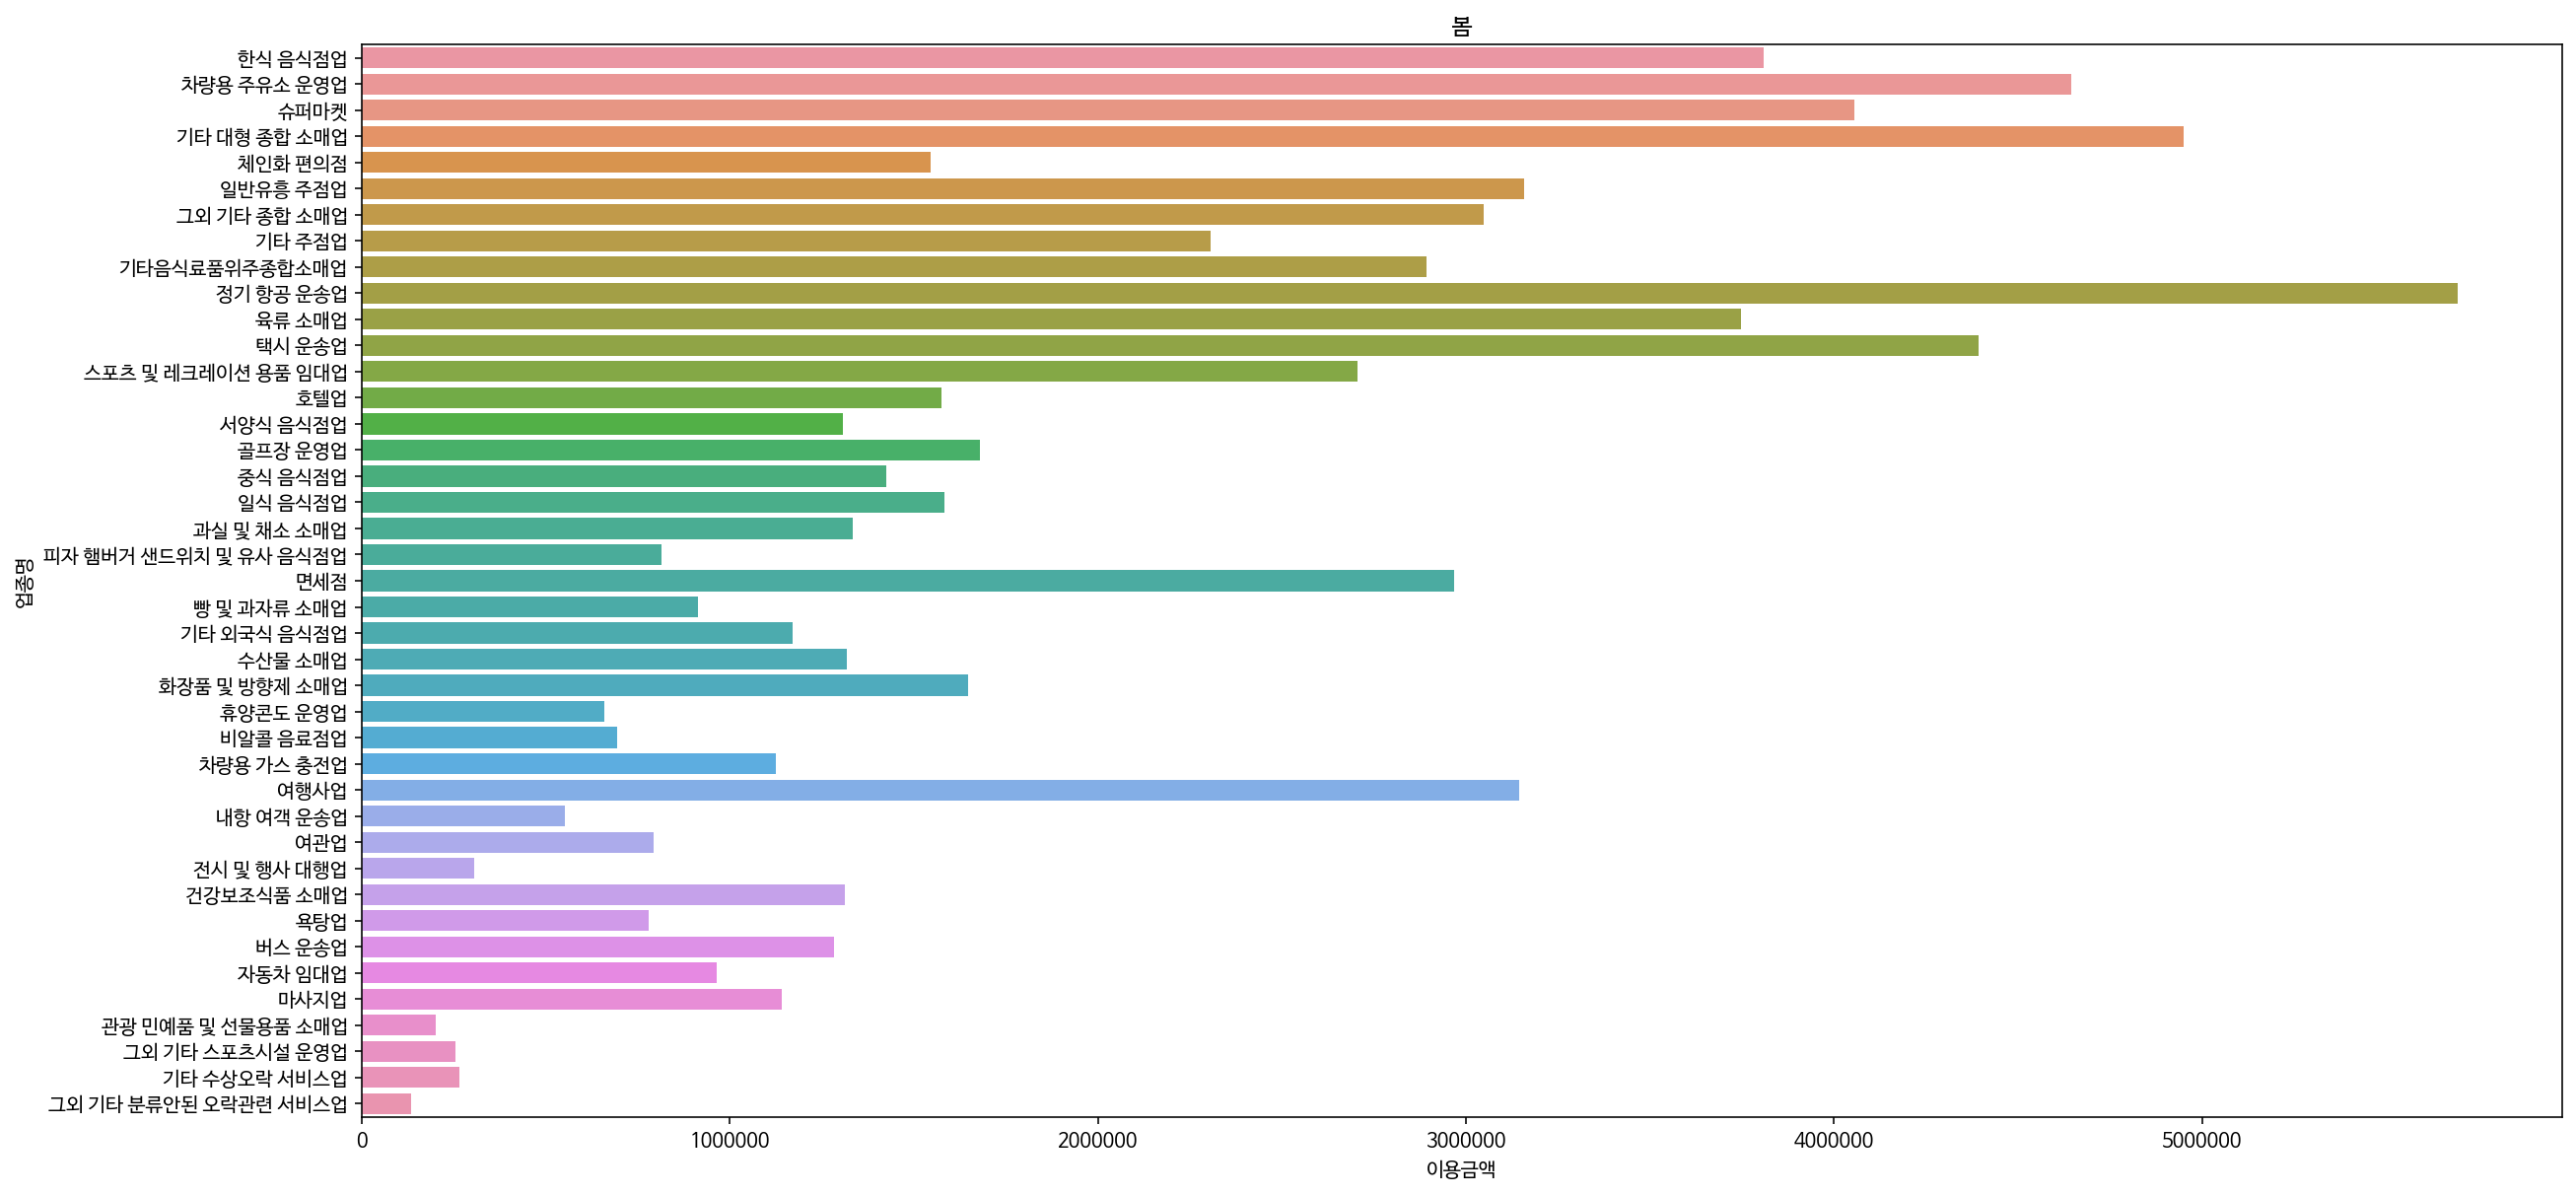

In [30]:
where=data_2019[data_2019['계절']=='겨울']
where=where.sort_values(by='이용금액',ascending=False)
fig = plt.figure(figsize = (20,10))
sns.barplot(x =where['이용금액'], y = where['업종명'],ci=None)
plt.title('봄')
plt.show()

### 4-2 거주지역과 카드이용지역이 다른 경우

In [31]:
ano=data[data['고객거주_시도']!=data['카드이용_시도']]

In [32]:
ano_1= ano.groupby(['카드이용_시도','고객거주_시도'])[['이용고객수','이용금액','이용건수']].sum().reset_index()

#### 1) 이용건수 기준

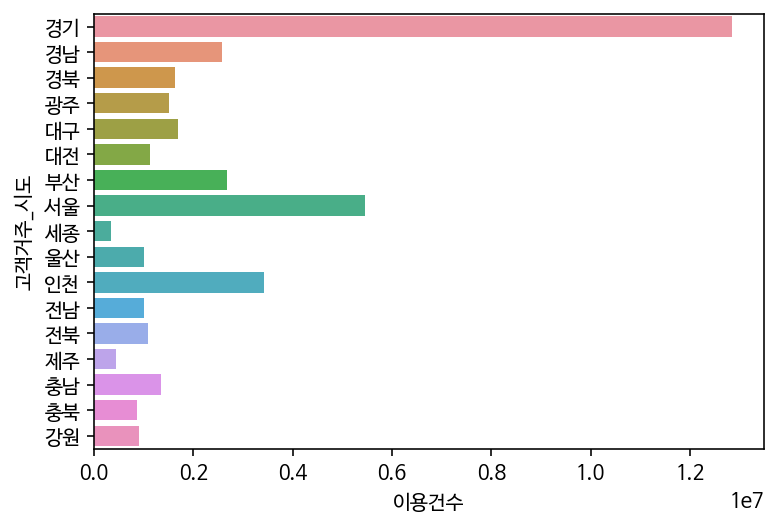

In [33]:
# 고객거주_시도
sns.barplot(x=ano_1['이용건수'], y=ano_1['고객거주_시도'],ci=None)

경기도, 서울, 인천 순으로 다른 지역에 많이 돈을 쓴다.

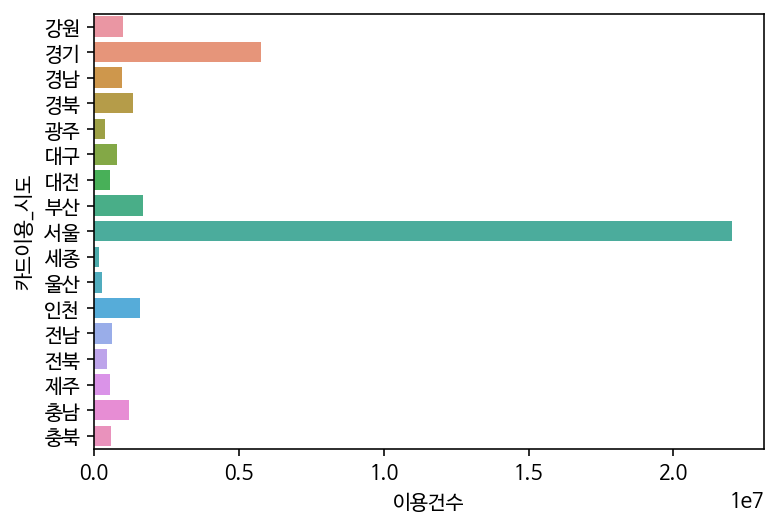

In [34]:
# 카드이용_시도
sns.barplot(x =ano_1['이용건수'], y = ano_1['카드이용_시도'],ci=None)

다른 지역 사람들이 서울에 와서 돈을 많이 쓴다.

#### 2) 이용금액 기준

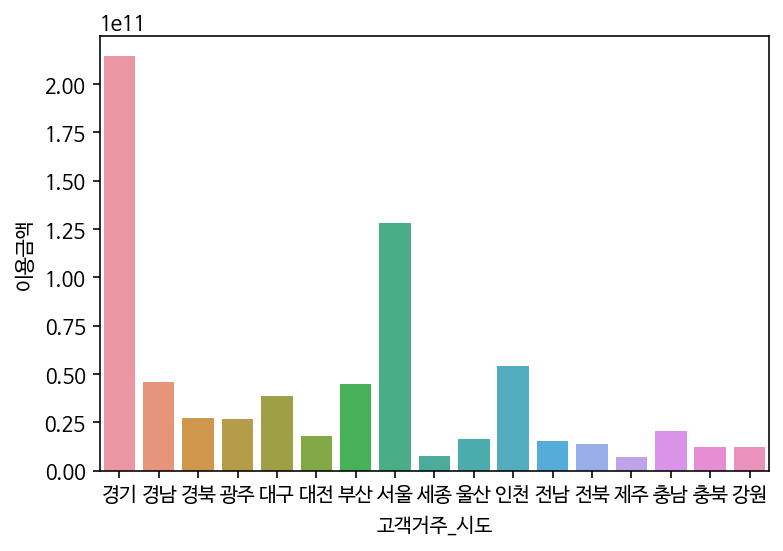

In [64]:
# 고객거주_시도
sns.barplot(x=ano_1['고객거주_시도'],y=ano_1['이용금액'], ci=None)

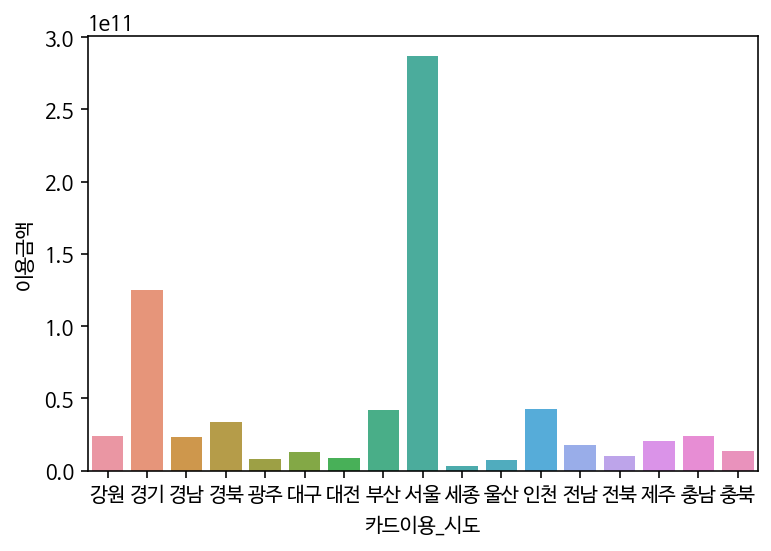

In [62]:
# 카드이용_시도
sns.barplot(x = ano_1['카드이용_시도'],y =ano_1['이용금액'], ci=None)

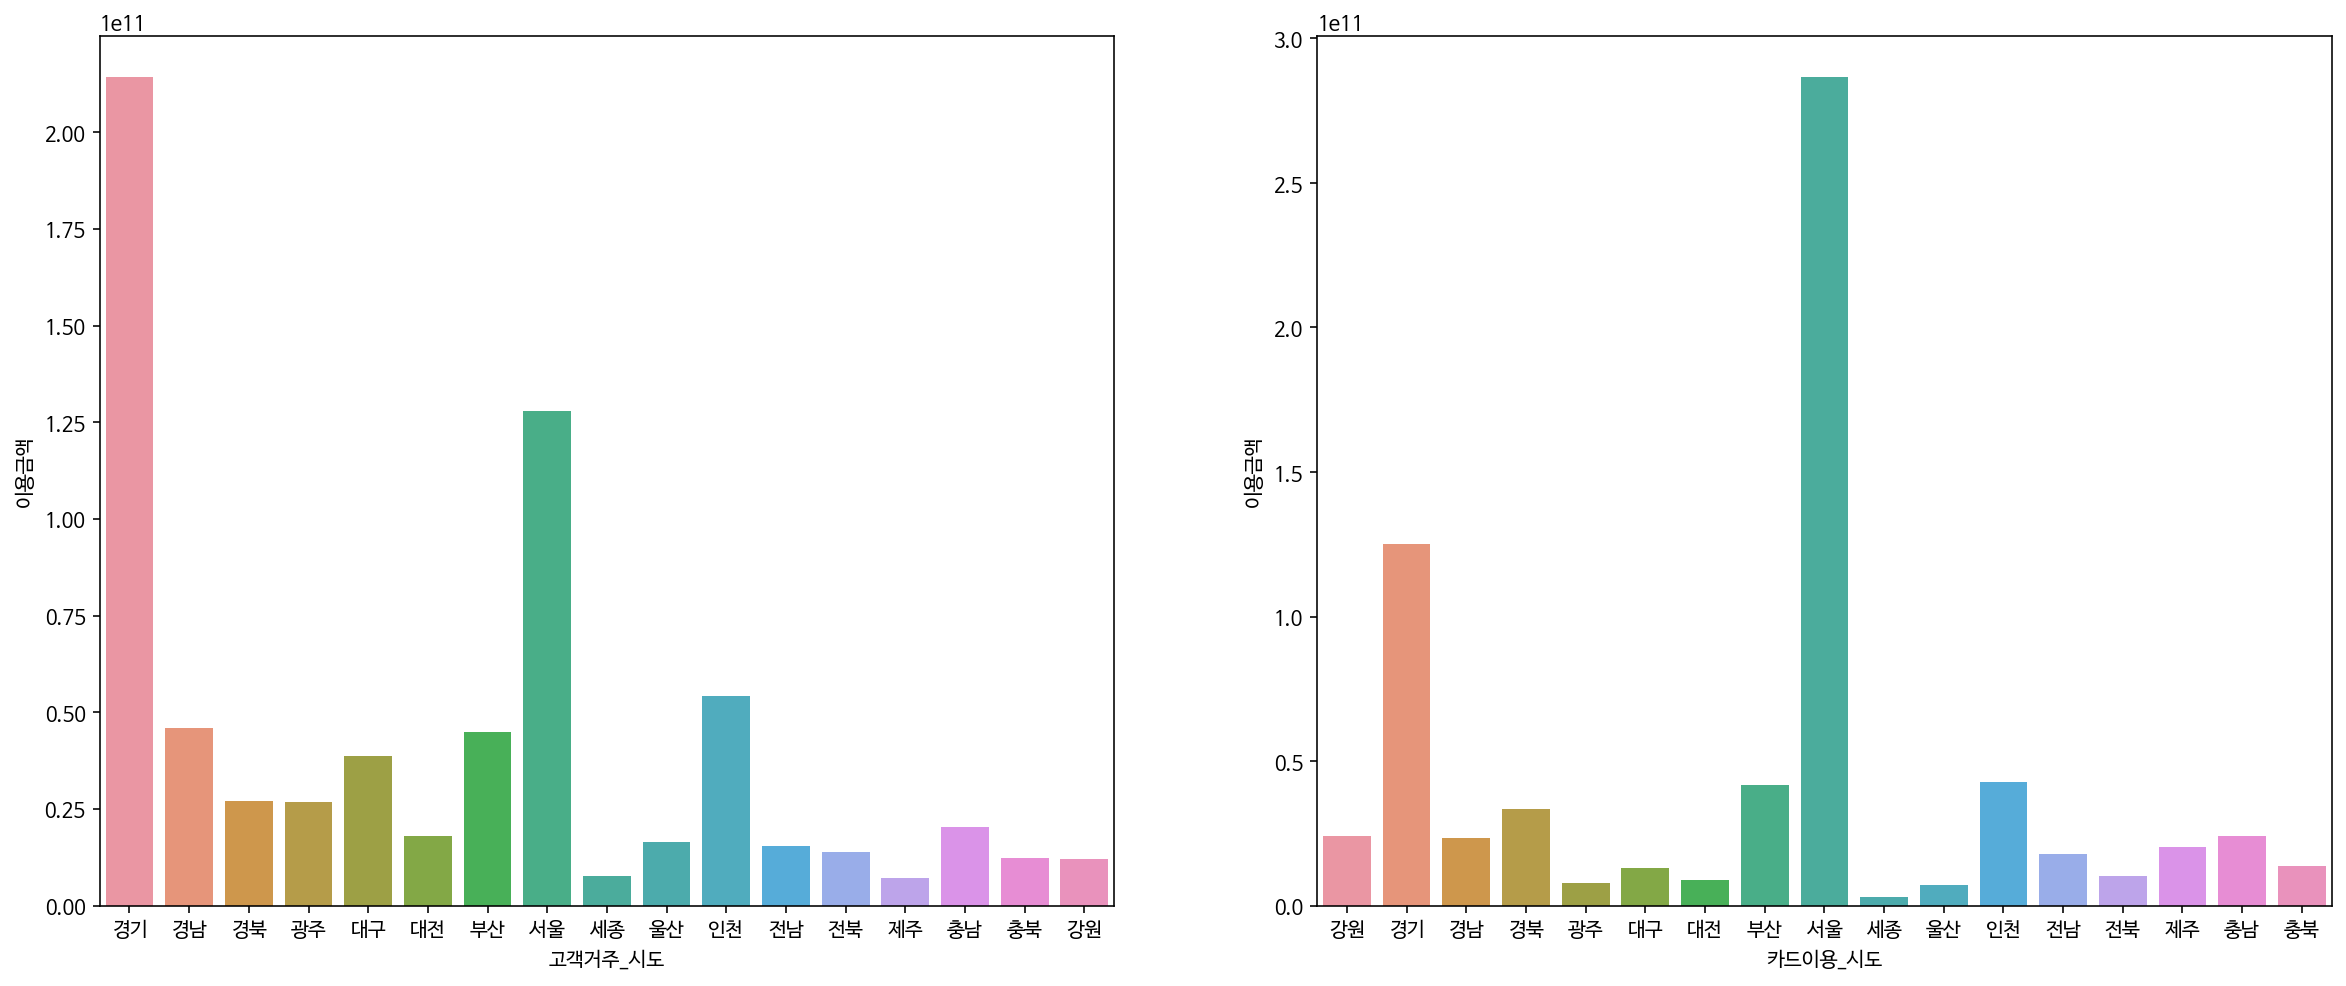

In [66]:
fig, axes = plt.subplots(figsize=(20,8),nrows=1, ncols=2,squeeze=False)
sns.barplot(x=ano_1['고객거주_시도'],y=ano_1['이용금액'], ci=None, ax=axes[0][0])
sns.barplot(x = ano_1['카드이용_시도'],y =ano_1['이용금액'], ci=None,ax=axes[0][1])

이렇게 이용금액이나 이용건수를 기준으로 나눴을 때 경기도 사람들이 대체로 다른 지역에 돈을 많이 쓰는 모습을 발견했다. 그래서 경기도 사람들은 어디에, 어떤 이유로 돈을 많이 쓰는지 확인해볼 것이다.(지역, 업종별)

In [38]:
ano_2=ano[ano['고객거주_시도']=='경기']
ano_2.head(2)

,연월,카드이용_시도,업종명,고객거주_시도,연령대,성별,가구생애주기,이용고객수,이용금액,이용건수,년,월,계절
25,201901,강원,골프장 운영업,경기,50,1,4,3,255100,3,2019,1,겨울
26,201901,강원,골프장 운영업,경기,60,1,5,4,910900,6,2019,1,겨울


In [39]:
ano_2= ano_2.groupby(['업종명','카드이용_시도'])[['이용고객수','이용금액','이용건수']].sum().reset_index()

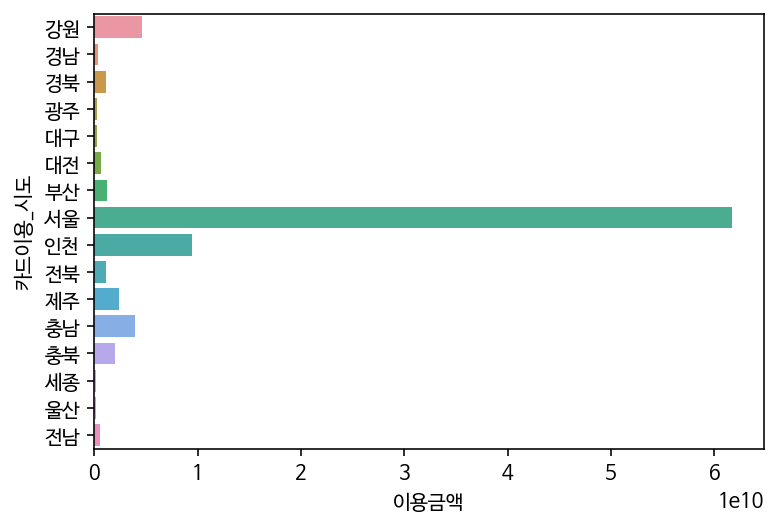

In [67]:
sns.barplot(x =ano_2['이용금액'], y = ano_2['카드이용_시도'],ci=None)

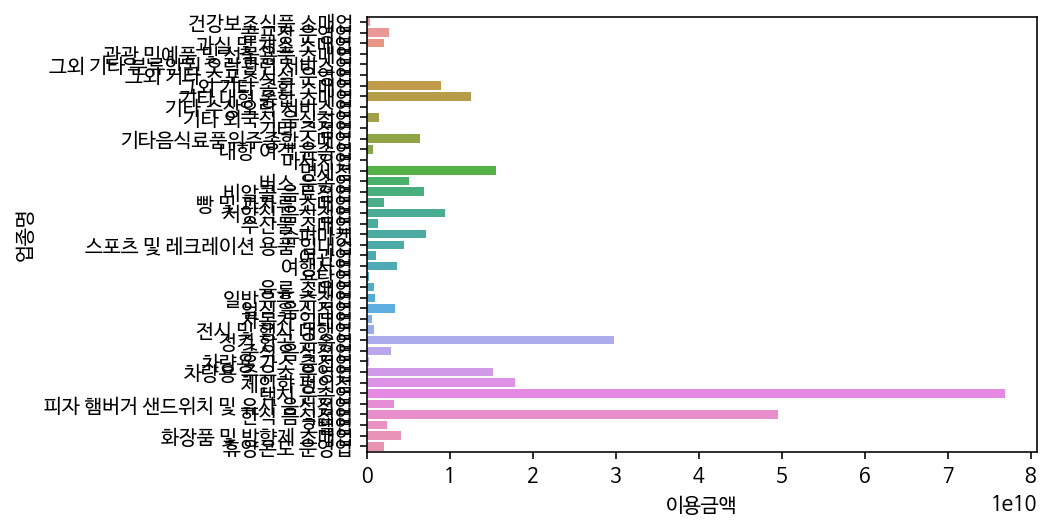

In [69]:
sns.barplot(y =ano_2['업종명'], x = ano_2['이용금액'],ci=None)